## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 3), reused 1 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (30/30), 4.21 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking  𝑘 .

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

In [4]:
df0_125.head()

,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a


2. Make scatterplots of the  (𝑋1,𝑋2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

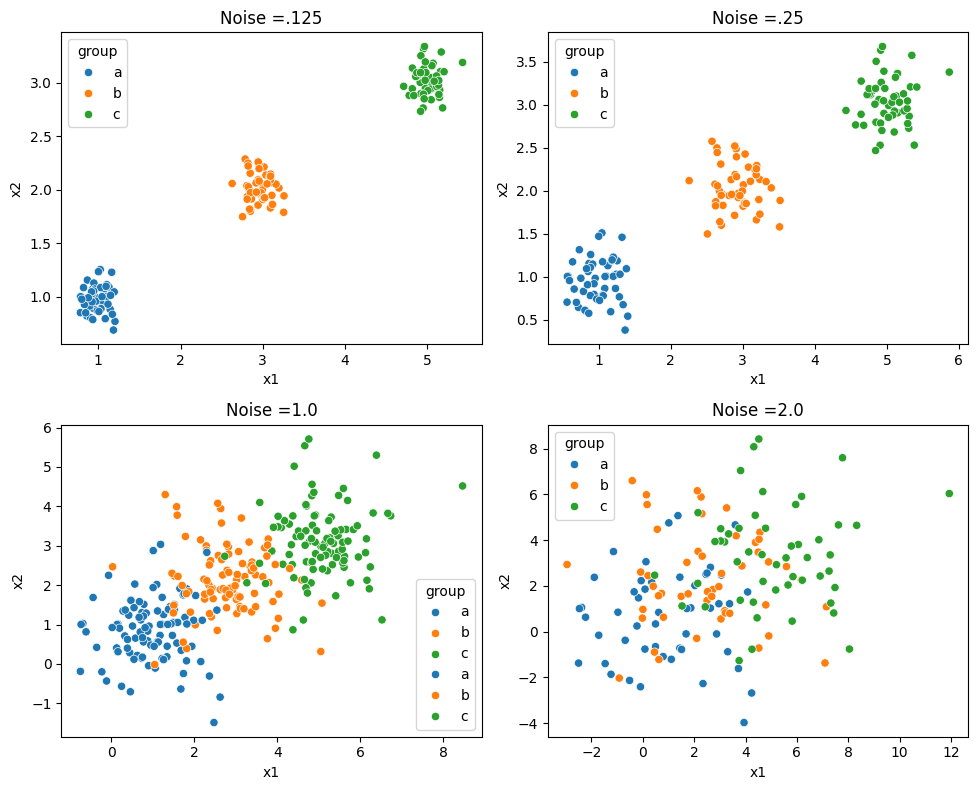

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2,2,figsize = (10,8))

# Scatterplots:
sns.scatterplot(data = df0_125, x='x1',y='x2',hue='group',ax=axes[0,0])
axes[0, 0].set_title("Noise =.125")

sns.scatterplot(data = df0_25, x='x1',y='x2',hue='group',ax=axes[0,1])
axes[0, 1].set_title("Noise =.25")

sns.scatterplot(data = df0_5, x='x1',y='x2',hue='group',ax=axes[1,0])
axes[1, 0].set_title("Noise =.5")

sns.scatterplot(data = df1_0, x='x1',y='x2',hue='group',ax=axes[1,0])
axes[1, 0].set_title("Noise =1.0")

sns.scatterplot(data = df2_0, x='x1',y='x2',hue='group',ax=axes[1,1])
axes[1, 1].set_title("Noise =2.0")


# Adjust layout
plt.tight_layout()
plt.show()


**As the *noise goes up*, *the visual distinctness* of the colors *decreases* significantly.**
* ***It is visually harder to identify distinct groups.***

3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘 . (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

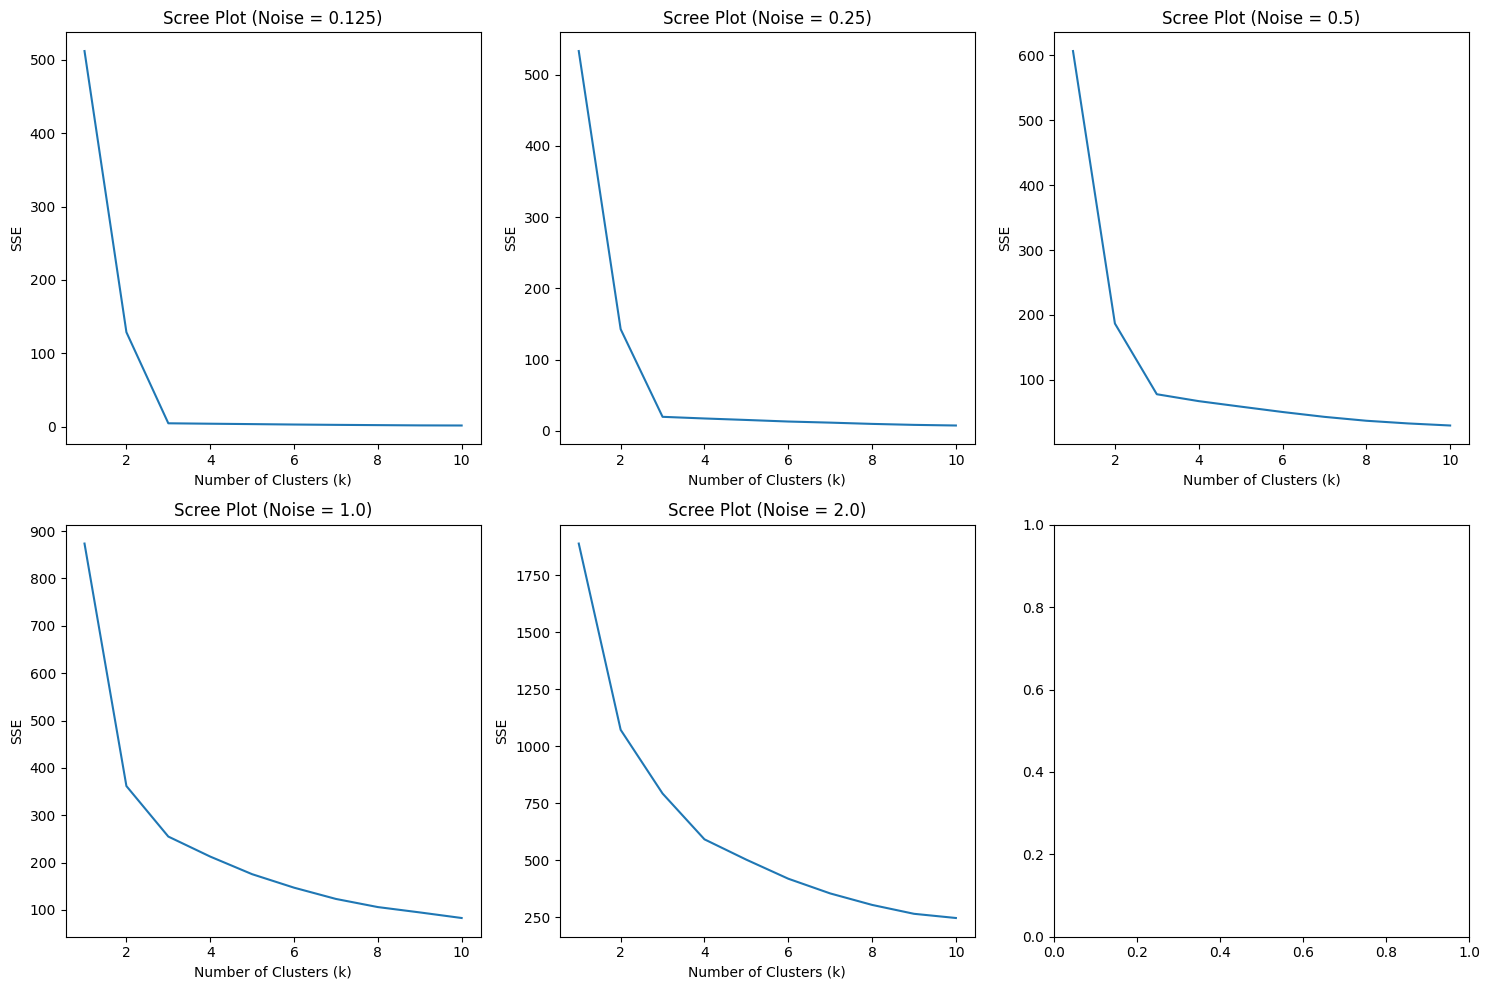

In [8]:
import numpy as np
from sklearn.cluster import KMeans

# Define datasets
datasets = {
    "Noise = 0.125": df0_125,
    "Noise = 0.25": df0_25,
    "Noise = 0.5": df0_5,
    "Noise = 1.0": df1_0,
    "Noise = 2.0": df2_0
}

k_bar = 10  # Maximum number of clusters

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create subplots
axes = axes.flatten()  # Flatten to make indexing easier

for i, (title, df) in enumerate(datasets.items()):
    X = df[['x1', 'x2']].values  # Extract feature columns
    SSE = []  # Store sum of squared errors

    for k in range(1, k_bar + 1):  # Avoid k=0 (invalid)
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        SSE.append(model.inertia_)

    sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE, ax=axes[i])
    axes[i].set_title(f'Scree Plot ({title})')
    axes[i].set_xlabel('Number of Clusters (k)')
    axes[i].set_ylabel('SSE')

plt.tight_layout()
plt.show()

# Used mixture of lecture notes and Chat to do this



*   Level of noise seems to affect the scree plot in that more noise makes the scree plot less pronounced.
  - That is, the presence of a clear elbow fades out as the noise level increases.
*   So, for higher noises, it is harder to select a clear k.
* Also, in terms of vertical axis across plots -- more noise ==> higher SSE.



4. Explain the intuition of the elbow, using this numerical simulation as an example.
* The intuition of the elbow is to decide on an optimal k, people look for a spot where the reduction in SSE of going from k-1 to k drops significantly compared from k to k-1.
* This means the *marginal benefit* of an additional cluster is small, and increasing k further is probably not really improving the fit.
* If there's no elbow, either
1. There aren't really any discrete clusters, and you're approximating a continuous trend with the groups
2. Maybe there are discrete clusters, but you need to do more feature engineering/transformations, like Principal Components Analysis, or use use a different algorithm/metric of error size (e.g. silhouette and gap statistic)

* In the three least noisy plots above, the optimal k is 3, I belive.





**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election? -- I did not answer this because I believe this was meant to be Q2 question.

In [14]:
SIPRI = pd.read_csv("/content/clustering/assignment/data/SIPRI Military Expenditure Database.csv")
SIPRI = SIPRI[SIPRI['Year']==2020]
SIPRI = SIPRI.dropna(axis=0)
len(SIPRI['Country'].unique())

148



*   I also ended up with 148 countries.



In [16]:
SIPRI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 32 to 5880
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           148 non-null    int64  
 1   Year                            148 non-null    int64  
 2   Country                         148 non-null    object 
 3   Spending (2020 USD)             148 non-null    float64
 4   Percent of GDP                  148 non-null    float64
 5   Percent of Government Spending  148 non-null    float64
 6   Spending per Capita             148 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 9.2+ KB


In [17]:
SIPRI.head()

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731




*   Not noticing any glaringly obvious further cleaning of the variables that is required, unless % of GDP and % of Government Spending is preferred to be multiplied by 100.



2. Max-min normalize Spending (2020 USD) and Spending per Capita. Use a scree plot to determine the optimal number of clusters for the  𝑘  means clustering algorithm. Make a scatter plot of Spending (2020 USD) and Spending per Capita, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. .groupby(cluster).describe()). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?

In [19]:
# Max-min normalizing
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

vars =  ['Spending (2020 USD)','Spending per Capita']

X = SIPRI.loc[:,vars]
X = X.apply(maxmin)

X.describe()

,Spending (2020 USD),Spending per Capita
count,148.000000,148.000000
mean,0.016888,0.106232
std,0.087367,0.170820
min,0.000000,0.000000
25%,0.000252,0.007926
50%,0.001222,0.032116
75%,0.006785,0.129250
max,1.000000,1.000000


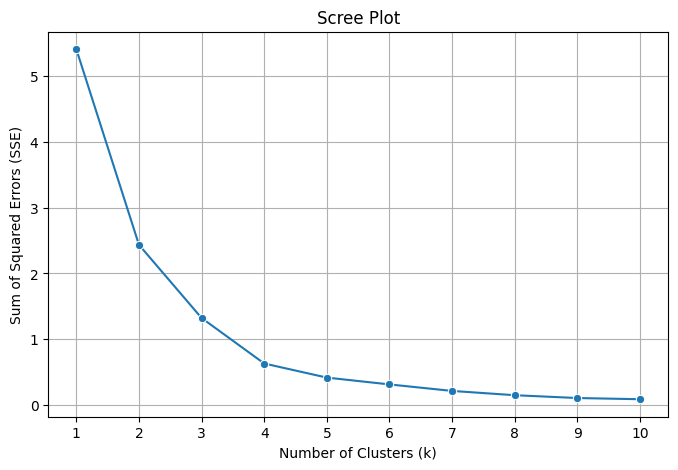

In [20]:
# Using a scree plot to determine the optimal number of clusters for the 𝑘 means clustering algorithm.

# Define number of clusters
k_bar = 10
SSE = []  # Store sum of squared errors

# Fit KMeans for k values from 1 to k_bar
for k in range(1, k_bar + 1):  # Avoid k=0
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

# Create scree plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE, marker="o")
plt.title("Scree Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(np.arange(1, k_bar + 1))
plt.grid(True)
plt.show()




*   It looks like k=4 has the inflection point.



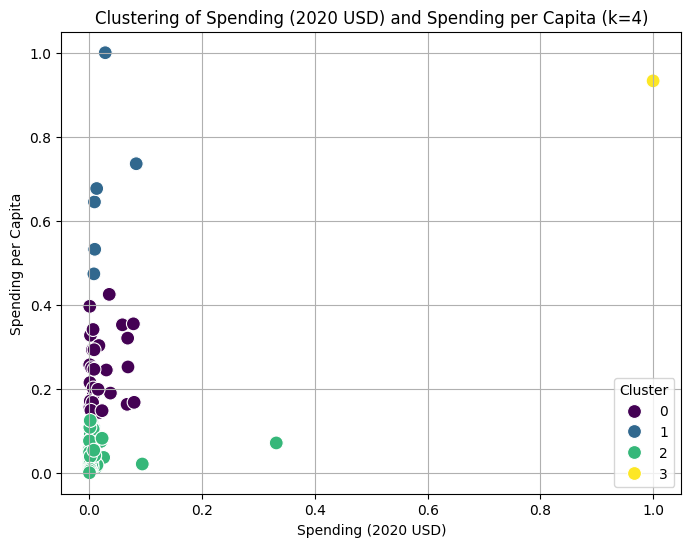

In [24]:
# Making a scatter plot of Spending (2020 USD) and Spending per Capita, and hue the dots by their cluster membership
# Fit KMeans with the chosen number of clusters
optimal_k = 4
model = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
X['cluster'] = model.fit_predict(X)  # Add the cluster labels to the DataFrame

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='Spending (2020 USD)', y='Spending per Capita', hue='cluster', palette='viridis', marker='o', s=100)

# Add titles and labels
plt.title(f"Clustering of Spending (2020 USD) and Spending per Capita (k={optimal_k})")
plt.xlabel("Spending (2020 USD)")
plt.ylabel("Spending per Capita")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()


In [25]:
X.groupby('cluster').describe()

Spending (2020 USD)                                                   \
                      count      mean       std      min       25%       50%   
cluster                                                                        
0                      30.0  0.021929  0.026443  0.00051  0.002936  0.007514   
1                       6.0  0.024968  0.029370  0.00782  0.009012  0.011069   
2                     111.0  0.006232  0.032639  0.00000  0.000156  0.000480   
3                       1.0  1.000000       NaN  1.00000  1.000000  1.000000   

                            Spending per Capita                                \
              75%       max               count      mean       std       min   
cluster                                                                         
0        0.033772  0.079271                30.0  0.240850  0.082121  0.143616   
1        0.024215  0.082927                 6.0  0.677089  0.185083  0.473454   
2        0.002940  0.331409               111.0  0.031542  0.033138  0.000000   
3        1.000000  1.000000                 1.0  0.933024       NaN  0.933024   

                                                 
              25%       50%       75%       max  
cluster                                          
0        0.167325  0.229550  0.300319  0.424651  
1        0.560161  0.660709  0.720941  1.000000  
2        0.005675  0.018445  0.049530  0.124462  
3        0.933024  0.933024  0.933024  0.933024

*What do you see? Where is the United States? Do you notice any patterns in the cluster membership?*

*   I see that cluster 3 is an outlier with high spending per capita of .933024 and high spending of 1.
*   Cluster 2 is the clargest with 111 observations. It is the lowest mean spending and spending per capita group.
*   Cluster 1 has the highest spending per capita, but low spending
*   Cluster 0 is intermediate.





In [34]:
# Step 1: Filter X for cluster 3
cluster_3_data = X[X['cluster'] == 3]

# Step 2: Get the indices of cluster 3 observations
cluster_3_indices = cluster_3_data.index

# Step 3: Use the indices to get the corresponding countries from SIPRI
cluster_3_countries = SIPRI.loc[cluster_3_indices, 'Country']

# Output the corresponding countries
print("Cluster 3 Country:", cluster_3_countries)

Cluster 3 Country: 5540    United States of America
Name: Country, dtype: object




*   The United States is the lone outlier observation in cluster 3 with high  extraordinarily high spending per capita and high spending.


3. Repeat part 2 for Percent of Government Spending and Percent of GDP. How do your results compare to part 2?

In [35]:
vars =  ['Percent of GDP','Percent of Government Spending']

X = SIPRI.loc[:,vars]
X = X.apply(maxmin)

X.describe()

,Percent of GDP,Percent of Government Spending
count,148.000000,148.000000
mean,0.198794,0.189895
std,0.152748,0.154989
min,0.000000,0.000000
25%,0.105258,0.088739
50%,0.155160,0.142575
75%,0.246638,0.267616
max,1.000000,1.000000


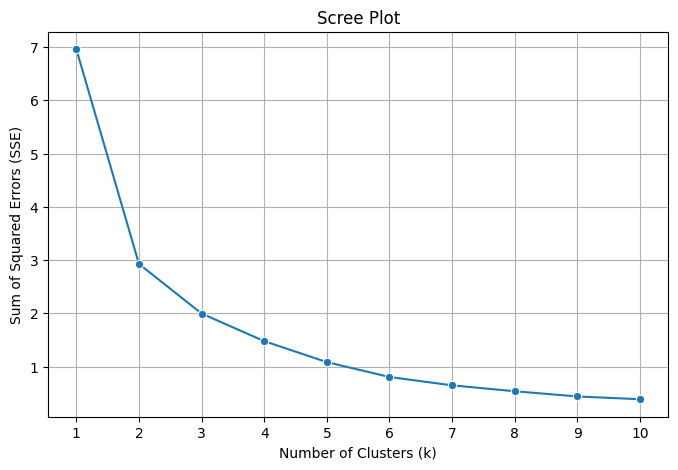

In [36]:
# Using a scree plot to determine the optimal number of clusters for the 𝑘 means clustering algorithm.

# Define number of clusters
k_bar = 10
SSE = []  # Store sum of squared errors

# Fit KMeans for k values from 1 to k_bar
for k in range(1, k_bar + 1):  # Avoid k=0
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

# Create scree plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE, marker="o")
plt.title("Scree Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(np.arange(1, k_bar + 1))
plt.grid(True)
plt.show()

* k = 2 elbow point.

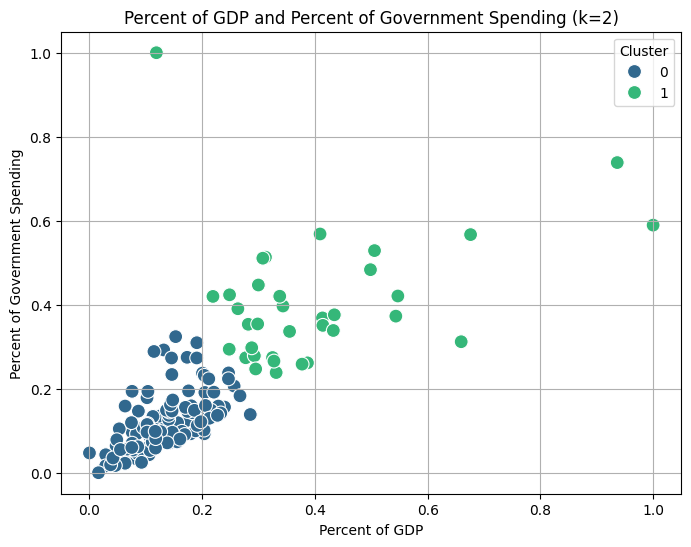

In [37]:
# Making a scatter plot of Spending (2020 USD) and Spending per Capita, and hue the dots by their cluster membership
# Fit KMeans with the chosen number of clusters
optimal_k = 2
model = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
X['cluster'] = model.fit_predict(X)  # Add the cluster labels to the DataFrame

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='Percent of GDP', y='Percent of Government Spending', hue='cluster', palette='viridis', marker='o', s=100)

# Add titles and labels
plt.title(f"Percent of GDP and Percent of Government Spending (k={optimal_k})")
plt.xlabel("Percent of GDP")
plt.ylabel("Percent of Government Spending")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()


In [38]:
X.groupby('cluster').describe()

Percent of GDP                                                    \
                 count      mean       std       min       25%       50%   
cluster                                                                    
0                113.0  0.136435  0.060622  0.000000  0.092397  0.137951   
1                 35.0  0.400125  0.184716  0.118758  0.293731  0.337621   

                            Percent of Government Spending            \
              75%       max                          count      mean   
cluster                                                                
0        0.180619  0.285294                          113.0  0.122422   
1        0.433550  1.000000                           35.0  0.407739   

                                                                     
              std       min       25%       50%       75%       max  
cluster                                                              
0        0.069369  0.000000  0.073413  0.112667  0.156306  0.324036  
1        0.154995  0.238514  0.295832  0.372842  0.465191  1.000000

*How do your results compare to part 2?*
* The optimal k for part 3 was 2, which suggests in this case that military spending by country as a percent of GDP and Government spending may fall in to two major groups in the global stage: countries with military spending making up a low % of GDP and gov. spending vs. countries with military spending making up high % of GDP and gov. spending.

4. Use  𝑘  means clustering with all four numeric variables: Spending (2020 USD), Spending per Capita, Percent of Government Spending, and Percent of GDP. How do your results compare to the previous two parts?

In [40]:
vars = ['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']
X = SIPRI[vars]
X = X.apply(maxmin)
X.describe()

,Spending (2020 USD),Spending per Capita,Percent of Government Spending,Percent of GDP
count,148.000000,148.000000,148.000000,148.000000
mean,0.016888,0.106232,0.189895,0.198794
std,0.087367,0.170820,0.154989,0.152748
min,0.000000,0.000000,0.000000,0.000000
25%,0.000252,0.007926,0.088739,0.105258
50%,0.001222,0.032116,0.142575,0.155160
75%,0.006785,0.129250,0.267616,0.246638
max,1.000000,1.000000,1.000000,1.000000


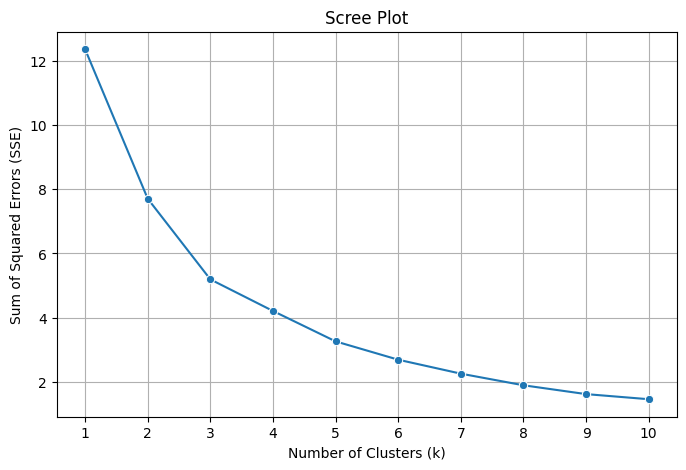

In [41]:
# Using a scree plot to determine the optimal number of clusters for the 𝑘 means clustering algorithm.

# Define number of clusters
k_bar = 10
SSE = []  # Store sum of squared errors

# Fit KMeans for k values from 1 to k_bar
for k in range(1, k_bar + 1):  # Avoid k=0
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

# Create scree plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE, marker="o")
plt.title("Scree Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(np.arange(1, k_bar + 1))
plt.grid(True)
plt.show()



*   k=3 is elbow point.



In [50]:
model = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
X['cluster'] = model.fit_predict(X)  # Add cluster labels to the DataFrame

import pandas as pd
pd.set_option('display.max_columns', None)
# Display a describe table conditional on cluster membership
X.groupby('cluster').describe()


Spending (2020 USD)                                                    \
                      count      mean       std       min       25%       50%   
cluster                                                                         
0                     111.0  0.009093  0.034018  0.000000  0.000156  0.000718   
1                      31.0  0.011276  0.022999  0.000198  0.000590  0.001794   
2                       6.0  0.190080  0.397790  0.007820  0.009882  0.020413   

                            Spending per Capita                                \
              75%       max               count      mean       std       min   
cluster                                                                         
0        0.005012  0.331409               111.0  0.077921  0.106273  0.000000   
1        0.009931  0.093692                31.0  0.084176  0.102326  0.007031   
2        0.069200  1.000000                 6.0  0.743931  0.194379  0.473454   

                                                 \
              25%       50%       75%       max   
cluster                                           
0        0.005675  0.026392  0.116959  0.531974   
1        0.018218  0.053528  0.086020  0.396213   
2        0.652714  0.706194  0.883690  1.000000   

        Percent of Government Spending                                \
                                 count      mean       std       min   
cluster                                                                
0                                111.0  0.118920  0.064803  0.000000   
1                                 31.0  0.396096  0.147343  0.238514   
2                                  6.0  0.437575  0.185799  0.258544   

                                                Percent of GDP            \
              25%       50%       75%       max          count      mean   
cluster                                                                    
0        0.073176  0.110877  0.152983  0.292315          111.0  0.135799   
1        0.295832  0.368563  0.435269  1.000000           31.0  0.339761   
2        0.322469  0.363513  0.535359  0.738448            6.0  0.635867   

                                                                     
              std       min       25%       50%       75%       max  
cluster                                                              
0        0.060929  0.000000  0.089606  0.137524  0.180003  0.285294  
1        0.116334  0.118758  0.279489  0.324845  0.411280  0.676168  
2        0.287303  0.298475  0.418816  0.601553  0.867175  1.000000

*   Cluster 0  has the lowest spending average across all variables
*   Cluster 1 has slightly higher spending than cluster 0 but still low. Generally middle of pack in values.
*   Cluster 2 has higher spending and has some extreme values (1). Highest mean per capita spending by far.





